<a href="https://colab.research.google.com/github/sladem-tox/PK_calcs/blob/main/SingleOralDose.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Single Oral plasma-time curve.
`Page by Dr Slade Matthews, The University of Sydney, 2023`

Follows the formula:\begin{equation} C = \frac{F.Dose.k_a}{Vd(k_a-k_e)} *(e^{-k_et} - e^{-k_at}) \end{equation}

In the cell below we require values for dose, Cl, Vd, F, and ka.
This simple model does not account for salting effects, metabolism, etc.

In [2]:
############
#Insert Drug parameters, Cl = clearance (L/h), Vd = volume of distribution (L), and dose in mg, bioavailability (F), and absorption rate constant (ka).
#Here we are using the PK parameters from the single IV curve we already ran in this repo.
# For more on the estimation of oral PK parameters see: Gabrielsson 2006 (page 508)
# Parameters:

dose =200
Cl = 20
Vd =200
#Bioavailability would need to be determined experimentally. F = AUCoral/AUCiv
F = 0.8
# We also need to set the absorption rate constant:
#Ka is experimentally extrapolated by means of a method of residuals (feathering) where ka corresponds to the slope of the residual line.
#Here the number chosen gives a nice shaped curve! You would need to consult published papers to find values of Ka for your drug or determine it experimentally.
ka = 0.009*60
############
#Assuming that we have the data from the single IV curve we now know Cl and Vd so k can be estimated:
#The elimination rate constant is simply given by CL over Vd
k = Cl/Vd

In [3]:
#Calculate half-life
import numpy as np
hl = -np.log(.5)/k
print("The half-life for the drug is %.2f hours." % hl)

The half-life for the drug is 6.93 hours.


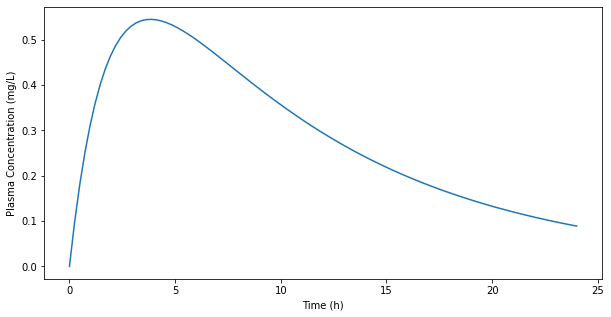

In [4]:
import matplotlib.pyplot as plt
import numpy as np

kdif = ka - k
t = np.linspace(0, 24, 100)
y = ((F*dose*ka)/(Vd*kdif)) * (np.exp(-k*t) - np.exp(-ka*t))
 
fig = plt.figure(figsize = (10, 5))
# Create the plot
plt.plot(t, y)
plt.xlabel("Time (h)")
plt.ylabel("Plasma Concentration (mg/L)")
 
# Show the plot
plt.show()

In [5]:
#The oral disposition equation can be defined as a function so we can ask it about specific times.
def oral(t):
  return str(round(((F*dose*ka)/(Vd*kdif)) * (np.exp(-k*t) - np.exp(-ka*t)),2)) + ' mg/L'

In [6]:
oral(5)

'0.53 mg/L'

In [10]:
for i in range(10):
  print(oral(i))

0.0 mg/L
0.32 mg/L
0.47 mg/L
0.53 mg/L
0.54 mg/L
0.53 mg/L
0.5 mg/L
0.47 mg/L
0.43 mg/L
0.39 mg/L
